#Fake News Detection

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline


In [7]:
fake = pd.read_csv("/content/Fake.csv")
true = pd.read_csv("/content/True.csv")


In [5]:
fake.shape

(23481, 4)

In [8]:
true.shape

(21417, 4)

In [9]:
fake['target'] = 'fake'
true['target'] = 'true'

In [10]:
data = pd.concat([fake, true]).reset_index(drop = True)
data.shape

(44898, 5)

In [11]:
from sklearn.utils import shuffle
data = shuffle(data)
data = data.reset_index(drop=True)

In [12]:
data.head()

,title,text,subject,date,target
0,Mohammed Dahlan speaks about Palestinian unity...,"GAZA (Reuters) - Mohammad Dahlan, who played a...",worldnews,"October 4, 2017",true
1,Trump Threatens To Shut Down NBC In Early Mor...,It s time to drag Donald Trump out of office. ...,News,"October 11, 2017",fake
2,BREAKING: Putin Directly Orchestrated Hacks T...,It s no secret that Russia was behind the elec...,News,"December 14, 2016",fake
3,FACT CHECK: U.S. Intelligence PROVES Trump A ...,Donald Trump seems to be willfully ignorant wh...,News,"October 10, 2016",fake
4,“MEATHEAD” ROB REINER Calls For ‘ALL OUT WAR’ ...,"Writing on Twitter Sunday, the All in the Fami...",politics,"Jun 26, 2017",fake


In [13]:
data.drop(["date"],axis=1,inplace=True)
data.head()

,title,text,subject,target
0,Mohammed Dahlan speaks about Palestinian unity...,"GAZA (Reuters) - Mohammad Dahlan, who played a...",worldnews,true
1,Trump Threatens To Shut Down NBC In Early Mor...,It s time to drag Donald Trump out of office. ...,News,fake
2,BREAKING: Putin Directly Orchestrated Hacks T...,It s no secret that Russia was behind the elec...,News,fake
3,FACT CHECK: U.S. Intelligence PROVES Trump A ...,Donald Trump seems to be willfully ignorant wh...,News,fake
4,“MEATHEAD” ROB REINER Calls For ‘ALL OUT WAR’ ...,"Writing on Twitter Sunday, the All in the Fami...",politics,fake


In [14]:
data.drop(["title"],axis=1,inplace=True)
data.head()

,text,subject,target
0,"GAZA (Reuters) - Mohammad Dahlan, who played a...",worldnews,true
1,It s time to drag Donald Trump out of office. ...,News,fake
2,It s no secret that Russia was behind the elec...,News,fake
3,Donald Trump seems to be willfully ignorant wh...,News,fake
4,"Writing on Twitter Sunday, the All in the Fami...",politics,fake


In [15]:
data['text'] = data['text'].apply(lambda x: x.lower())
data.head()

,text,subject,target
0,"gaza (reuters) - mohammad dahlan, who played a...",worldnews,true
1,it s time to drag donald trump out of office. ...,News,fake
2,it s no secret that russia was behind the elec...,News,fake
3,donald trump seems to be willfully ignorant wh...,News,fake
4,"writing on twitter sunday, the all in the fami...",politics,fake


In [16]:
import string

def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

data['text'] = data['text'].apply(punctuation_removal)

In [17]:
data.head()

,text,subject,target
0,gaza reuters mohammad dahlan who played a key...,worldnews,true
1,it s time to drag donald trump out of office b...,News,fake
2,it s no secret that russia was behind the elec...,News,fake
3,donald trump seems to be willfully ignorant wh...,News,fake
4,writing on twitter sunday the all in the famil...,politics,fake


In [18]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [19]:
data.head()

,text,subject,target
0,gaza reuters mohammad dahlan played key backro...,worldnews,true
1,time drag donald trump office act soon constit...,News,fake
2,secret russia behind election hacks donald tru...,News,fake
3,donald trump seems willfully ignorant comes ru...,News,fake
4,writing twitter sunday family star mentioned f...,politics,fake


#Data Exploration

subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10145
Name: text, dtype: int64


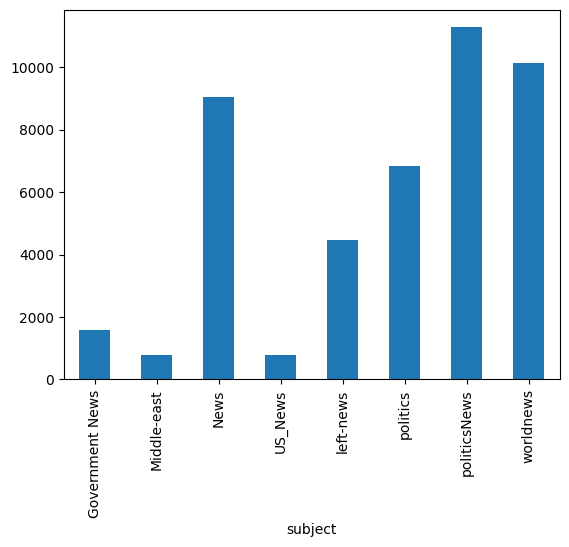

In [20]:
print(data.groupby(['subject'])['text'].count())
data.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()

target
fake    23481
true    21417
Name: text, dtype: int64


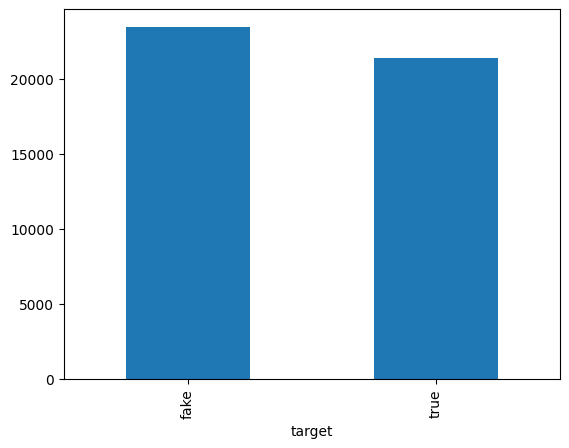

In [21]:
print(data.groupby(['target'])['text'].count())
data.groupby(['target'])['text'].count().plot(kind="bar")
plt.show()

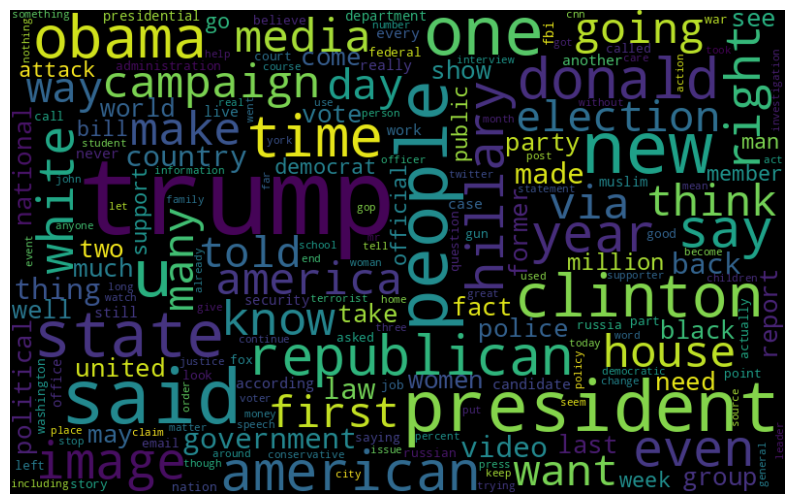

In [22]:
from wordcloud import WordCloud

fake_data = data[data["target"] == "fake"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

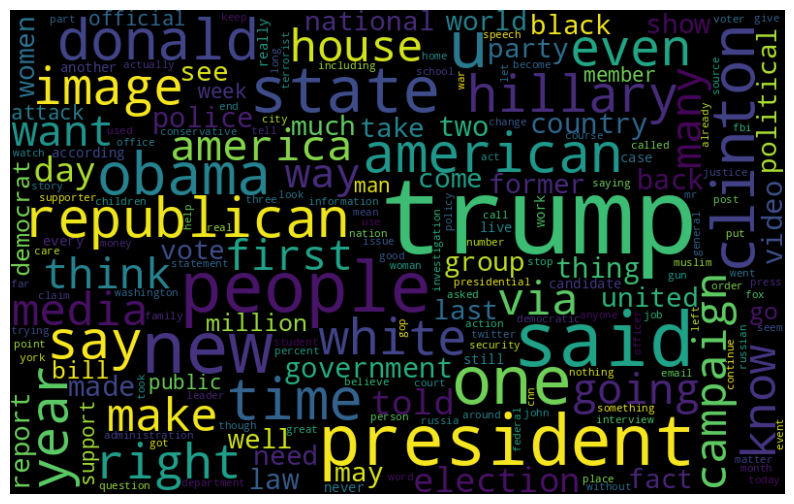

In [23]:
from wordcloud import WordCloud

real_data = data[data["target"] == "true"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [26]:
from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

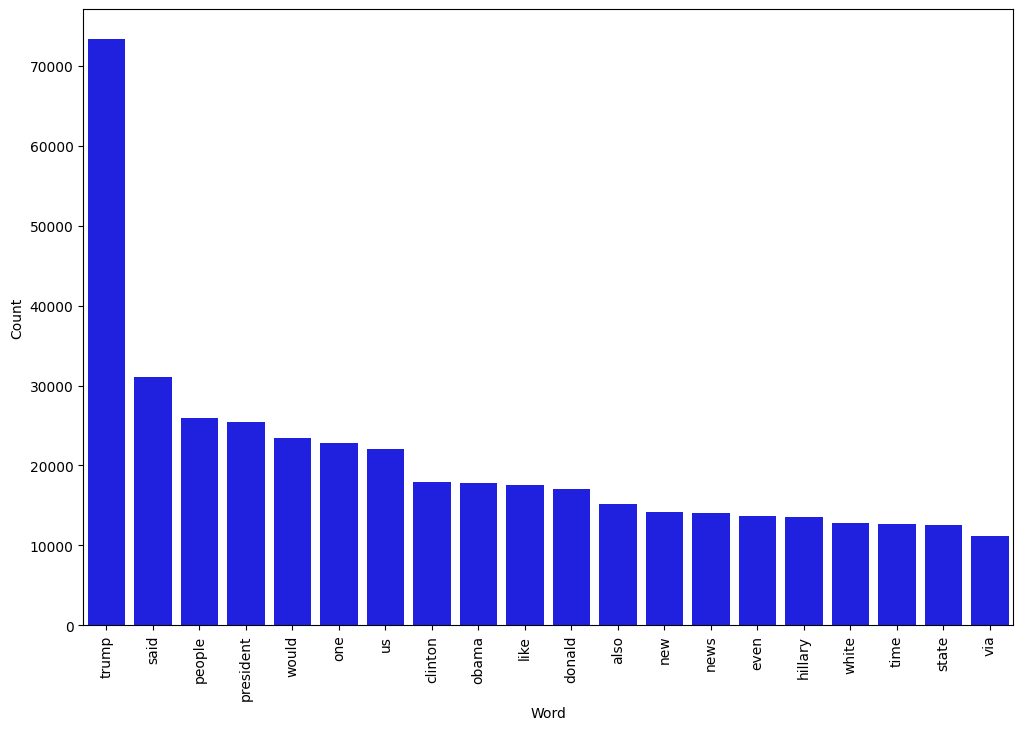

In [27]:
counter(data[data["target"] == "fake"], "text", 20)

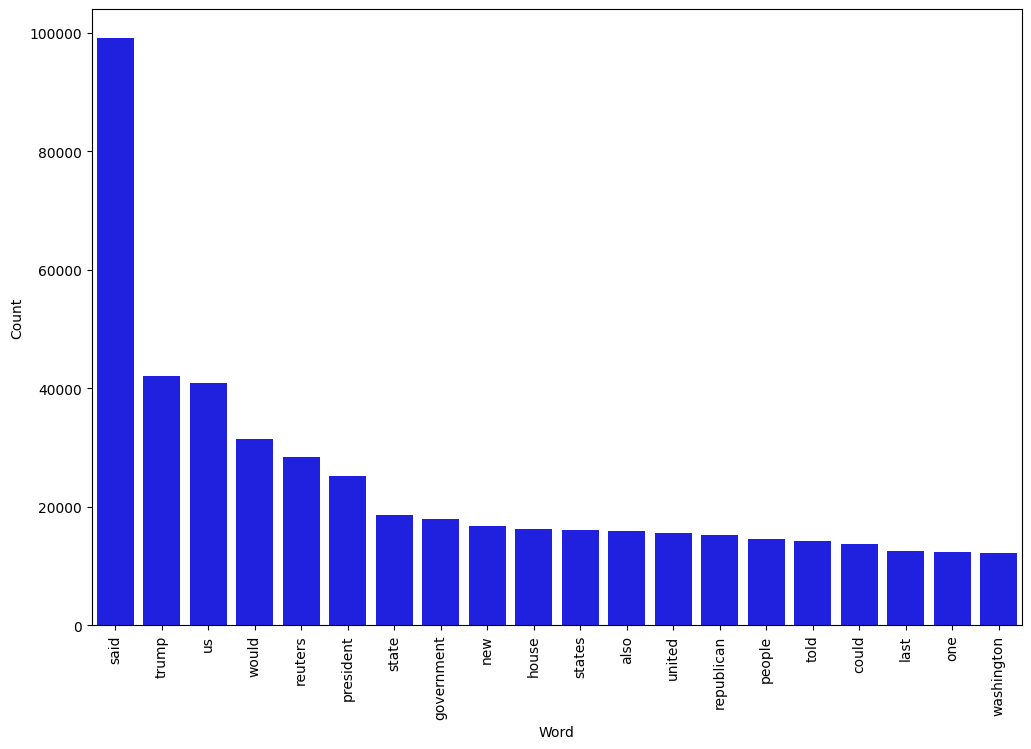

In [28]:
counter(data[data["target"] == "true"], "text", 20)

In [29]:
from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [30]:
X_train,X_test,y_train,y_test = train_test_split(data['text'], data.target, test_size=0.2, random_state=42)

#Naive Bayes

In [37]:
dct = dict()

from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', NB_classifier)])

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

dct['Naive Bayes'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 94.89%


Confusion matrix, without normalization


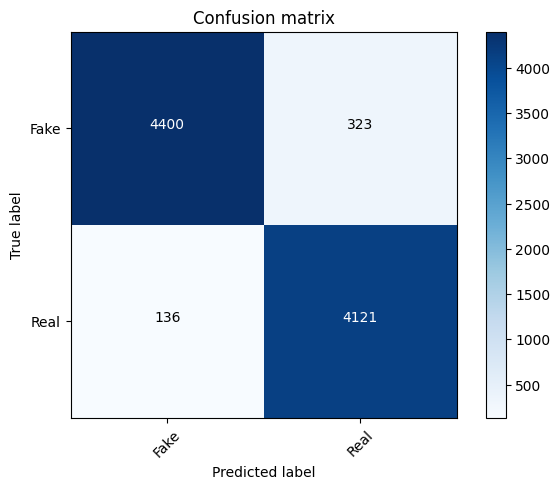

In [38]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

#Logistic regression

In [39]:
from sklearn.linear_model import LogisticRegression

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])

# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['Logistic Regression'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 98.88%


Confusion matrix, without normalization


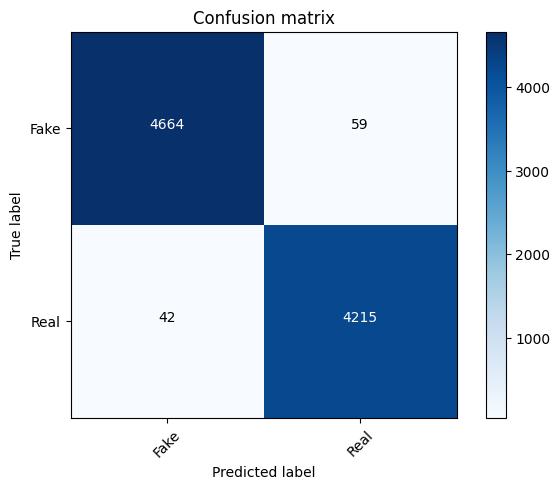

In [40]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

#decision Tree

In [41]:
from sklearn.tree import DecisionTreeClassifier

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 20,
                                           splitter='best',
                                           random_state=42))])
model = pipe.fit(X_train, y_train)

prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['Decision Tree'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 99.54%


Confusion matrix, without normalization


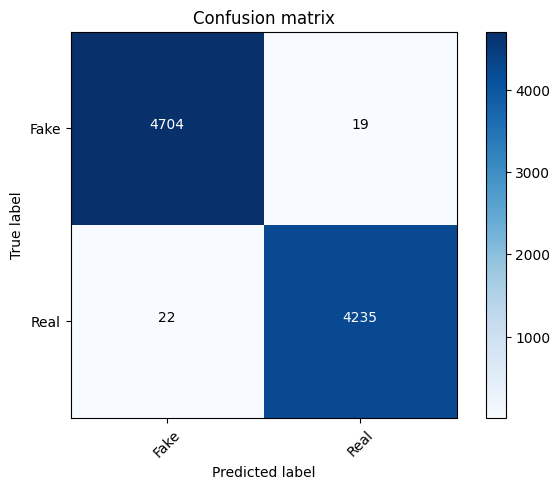

In [42]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

#Random Forest

In [43]:
from sklearn.ensemble import RandomForestClassifier

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', RandomForestClassifier(n_estimators=50, criterion="entropy"))])

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['Random Forest'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 99.08%


Confusion matrix, without normalization


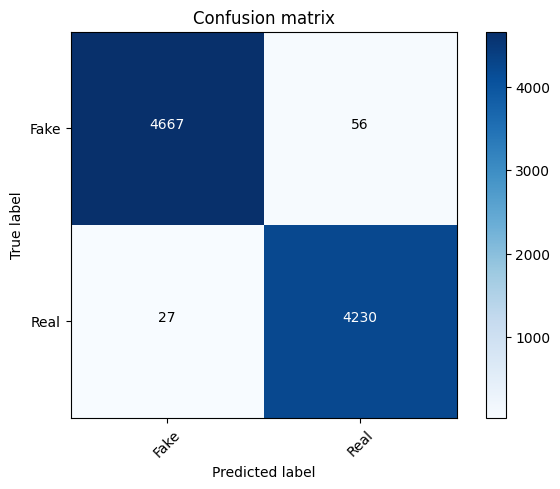

In [44]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

#SVM

In [45]:
from sklearn import svm
clf = svm.SVC(kernel='linear')

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', clf)])

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['SVM'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 99.47%


Confusion matrix, without normalization


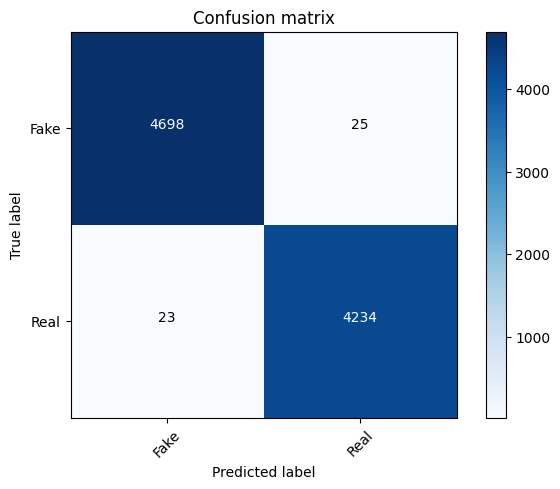

In [46]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

#Comparing Different Models

([<matplotlib.axis.YTick at 0x7d85a0f46210>,
 [Text(0, 91, '91'),
  Text(0, 92, '92'),
  Text(0, 93, '93'),
  Text(0, 94, '94'),
  Text(0, 95, '95'),
  Text(0, 96, '96'),
  Text(0, 97, '97'),
  Text(0, 98, '98'),
  Text(0, 99, '99'),
  Text(0, 100, '100')])

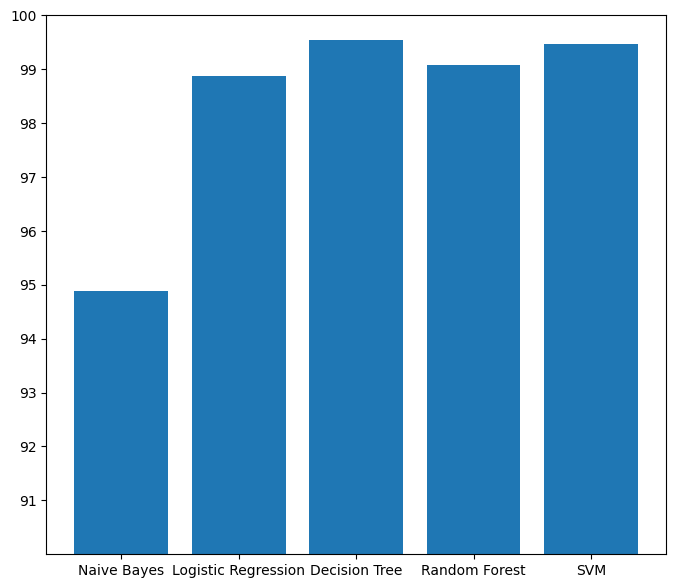

In [47]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,7))
plt.bar(list(dct.keys()),list(dct.values()))
plt.ylim(90,100)
plt.yticks((91, 92, 93, 94, 95, 96, 97, 98, 99, 100))

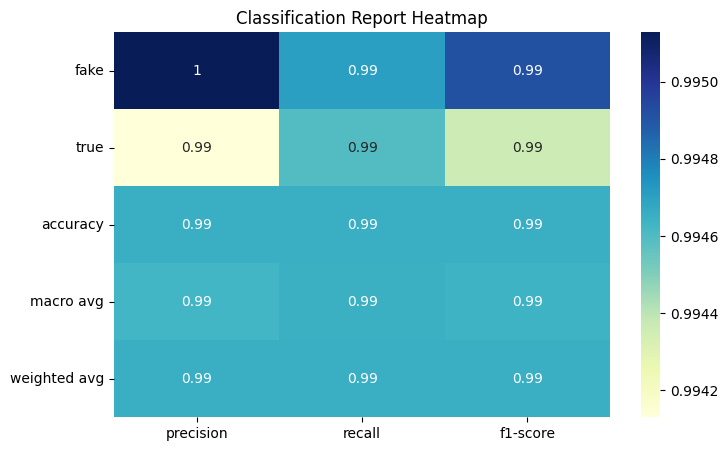

In [50]:
from sklearn.metrics import classification_report

report = classification_report(y_test, prediction, output_dict=True)

report_df = pd.DataFrame(report).iloc[:-1, :].T
plt.figure(figsize=(8, 5))
sns.heatmap(report_df, annot=True, cmap='YlGnBu')
plt.title('Classification Report Heatmap')
plt.show()